## Tutorial 6 In-class Exercise Suggested Solution & R codes

#### Question 3 Two-sample variance test

=== Blood Glucose Monitor Consistency Test ===

Device A: Mean = 119.08, Std = 5.20
Device B: Mean = 120.88, Std = 3.62

F-statistic: 2.0678
P-value: 0.0932
Critical value: 2.4837
Fail to reject H0: No evidence Device B is more consistent


/tmp/ipython-input-863003602.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([device_A, device_B], labels=['Device A', 'Device B'])


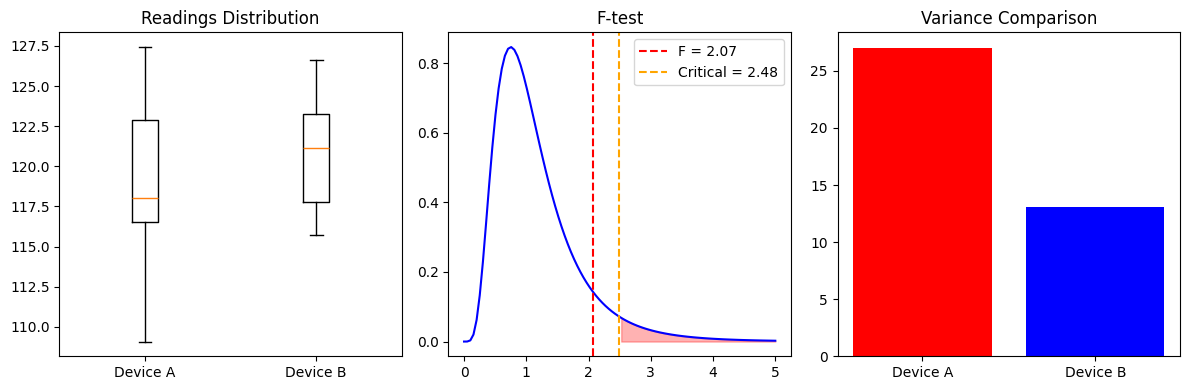

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(123)

# Generate data
n = 15
device_A = np.random.normal(120, 4.5, n)
device_B = np.random.normal(120, 3.0, n)

print("=== Blood Glucose Monitor Consistency Test ===\n")
print(f"Device A: Mean = {np.mean(device_A):.2f}, Std = {np.std(device_A, ddof=1):.2f}")
print(f"Device B: Mean = {np.mean(device_B):.2f}, Std = {np.std(device_B, ddof=1):.2f}")

# F-test
var_A = np.var(device_A, ddof=1)
var_B = np.var(device_B, ddof=1)
F_stat = var_A / var_B
df1 = df2 = n - 1
p_value = 1 - stats.f.cdf(F_stat, df1, df2)

alpha = 0.05
critical_value = stats.f.ppf(1 - alpha, df1, df2)

print(f"\nF-statistic: {F_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Critical value: {critical_value:.4f}")

# Conclusion
if p_value < alpha:
    print("Reject H0: Device B provides more consistent readings")
else:
    print("Fail to reject H0: No evidence Device B is more consistent")

# Visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.boxplot([device_A, device_B], labels=['Device A', 'Device B'])
plt.title('Readings Distribution')

plt.subplot(1, 3, 2)
x = np.linspace(0, 5, 100)
plt.plot(x, stats.f.pdf(x, df1, df2), 'b-')
plt.axvline(F_stat, color='r', linestyle='--', label=f'F = {F_stat:.2f}')
plt.axvline(critical_value, color='orange', linestyle='--', label=f'Critical = {critical_value:.2f}')
plt.fill_between(x[x > critical_value], stats.f.pdf(x[x > critical_value], df1, df2), color='red', alpha=0.3)
plt.title('F-test')
plt.legend()

plt.subplot(1, 3, 3)
plt.bar(['Device A', 'Device B'], [var_A, var_B], color=['red', 'blue'])
plt.title('Variance Comparison')

plt.tight_layout()
plt.show()

**Formulate Hypotheses**

$$
\begin{array}{ll}
H_0: \sigma_1^2 = \sigma_2^2 \\
H_1: \sigma_1^2 > \sigma_2^2
\end{array}
$$


**Select Test Statistic**

Independent samples t-test statistic:

$$
F=\frac{s_1^2}{s_2^2}
$$


Where:
- $s_1^2 = \frac{1}{n_1-1}\sum_{i=1}^{n_1}(x_i - \bar{x})^2=5.20$
- $s_2^2 = \frac{1}{n_2-1}\sum_{i=1}^{n_2}(y_i - \bar{y})^2=3.62$
- $n_1 = n_2 = 15$


**Calculate Test Statistic**

$$
F=2.0678
$$


**Determine Sampling Distribution**

Under $H_0$, $F \sim F_{n_1-1,n_2-1}$ (F-distribution with $n_1-1,n_2-1$ degrees of freedom)

**Calculate $p$-value**

$$
p=P\left(F_{n_1-1,n_2-1}>2.0678 \mid H_0\right)=0.0932
$$


**Make Decision**

Set significance level $\alpha =0.05 $
Since $ p=0.0932 > 0.05 $, fail to reject the null hypothesis.

#### **R codes for Tutorial 6**

In [9]:
# "代码执行程序" -> "更改运行时类型" -> "运行时类型：R"


# =============================================================================
# PROBLEM 1: Testing the Fairness of a Game Coin
# =============================================================================
cat("=== PROBLEM 1: Coin Fairness Test ===\n")
set.seed(1234)
heads <- rbinom(1, 100, 0.6)
binom_test <- binom.test(heads, 100, 0.5, alternative = "two.sided")
cat("Heads:", heads, "/ 100\n")
cat("P-value:", round(binom_test$p.value, 4), "\n")
cat("Conclusion:", ifelse(binom_test$p.value < 0.05,
                         "Coin is unfair", "No evidence coin is unfair"), "\n\n")

# =============================================================================
# PROBLEM 2: Teaching Method Effectiveness
# =============================================================================
cat("=== PROBLEM 2: Teaching Method Test ===\n")
set.seed(1234)
traditional <- rnorm(100, 75, 10)
new_method <- rnorm(100, 78, 10)
t_test <- t.test(new_method, traditional, alternative = "greater")
cat("Traditional - Mean:", round(mean(traditional), 2), "\n")
cat("New Method - Mean:", round(mean(new_method), 2), "\n")
cat("P-value:", round(t_test$p.value, 4), "\n")
cat("Conclusion:", ifelse(t_test$p.value < 0.05,
                         "New method is better", "No evidence new method is better"), "\n\n")

# =============================================================================
# PROBLEM 3: Blood Glucose Monitor Consistency
# =============================================================================
cat("=== PROBLEM 3: Device Consistency Test ===\n")
set.seed(1234)
device_A <- rnorm(15, 120, 4.5)
device_B <- rnorm(15, 120, 3.0)

f_test <- var.test(device_A, device_B, alternative = "greater")
cat("Device A - SD:", round(sd(device_A), 2), "\n")
cat("Device B - SD:", round(sd(device_B), 2), "\n")
cat("P-value:", round(f_test$p.value, 4), "\n")
cat("Conclusion:", ifelse(f_test$p.value < 0.05,
                         "Device B is more consistent",
                         "No evidence Device B is more consistent"), "\n")

=== PROBLEM 1: Coin Fairness Test ===
Heads: 63 / 100
P-value: 0.012 
Conclusion: Coin is unfair 

=== PROBLEM 2: Teaching Method Test ===
Traditional - Mean: 73.43 
New Method - Mean: 78.41 
P-value: 3e-04 
Conclusion: New method is better 

=== PROBLEM 3: Device Consistency Test ===
Device A - SD: 4.07 
Device B - SD: 2.8 
P-value: 0.0865 
Conclusion: No evidence Device B is more consistent 
